<a href="https://colab.research.google.com/github/sid-vt/DL-Research/blob/main/CNN%20-%202D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
# import CV
from PIL import Image
from matplotlib import pyplot as plt
# import scikit
from sklearn.model_selection import train_test_split
import os
import numpy as np
import tensorflow as tf
import pandas  as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import h5py
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = 3000
import torchvision

In [13]:
# from google.colab import files
# uploaded = files.upload()

Saving results.txt to results.txt


In [38]:
X = np.load('ImgDS1.npy')
X.shape

(5000, 64, 65, 3)

In [39]:
# Scaling with min max

X_min = X.min()
X_max = X.max()

X = (X - X_min)/(X_max - X_min)

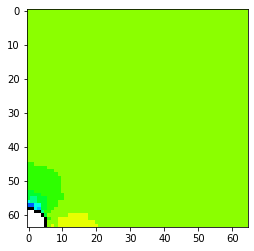

0.5143671442936147

In [52]:
from PIL import Image

data = X[10]
# data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
# img.save('my.png')
# img.show()
plt.imshow(data, interpolation='nearest')
plt.show()
X[10].mean()

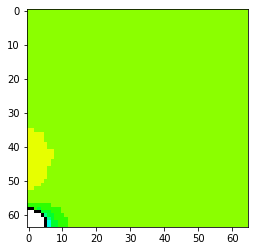

0.5638555806938159

In [53]:
from PIL import Image

data = X[9]
# data[0:256, 0:256] = [255, 0, 0] # red patch in upper left
img = Image.fromarray(data, 'RGB')
# img.save('my.png')
# img.show()
plt.imshow(data, interpolation='nearest')
plt.show()
X[11].mean()

In [54]:
# y = []
# for i in range (X.shape[0]):
#     temp = X[i].mean()
#     y.append(temp)

In [55]:
# X = np.array(y)

In [56]:
y = np.loadtxt('results.txt')

In [57]:
y  = (y - y.min())/(y.max()-y.min())

In [189]:
# plt.scatter(X,y)

In [286]:
 X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.1)

In [287]:
X_train.shape

(4500, 64, 65, 3)

In [288]:
y_train.shape

(4500,)

In [289]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(2,2 ), activation='relu', kernel_initializer='glorot_uniform', input_shape=(64,65,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization(axis = 1))
model.add(Dropout(0.1))

# model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# model.add(MaxPooling2D(pool_size=(2, 2,)))
# model.add(Dropout(0.1))

# model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# model.add(MaxPooling2D(pool_size=(2, 2,)))
# model.add(Dropout(0.5))

# model.add(Conv3D(256, kernel_size=(2, 2, 2), activation='relu', kernel_initializer='glorot_uniform'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))
# model.add(BatchNormalization())

# model.add(BatchNormalization(center=True, scale=True))
# model.add(Dropout(0.5))


model.add(Flatten())

# model.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 63, 64, 64)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 31, 32, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 31, 32, 64)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 63488)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               16253184  
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 257       
Total params: 16,254,273
Trainable params: 16,254,273
Non-trainable params: 0
_________________________________________

In [300]:
# Compile the model
model.compile( loss=tf.keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['mae'])

# Fit data to model
history = model.fit(X_train ,y_train, validation_data=(X_test,y_test),
            batch_size=75,
            epochs=100,
            verbose=1)

Epoch 1/100
60/60 [==============================] - 1s 17ms/step - loss: 0.0492 - mae: 0.1829 - val_loss: 0.0448 - val_mae: 0.1734
Epoch 2/100
60/60 [==============================] - 1s 13ms/step - loss: 0.0450 - mae: 0.1744 - val_loss: 0.0518 - val_mae: 0.1950
Epoch 3/100
60/60 [==============================] - 1s 14ms/step - loss: 0.0473 - mae: 0.1795 - val_loss: 0.0470 - val_mae: 0.1835
Epoch 4/100
60/60 [==============================] - 1s 13ms/step - loss: 0.0452 - mae: 0.1777 - val_loss: 0.0493 - val_mae: 0.1896
Epoch 5/100
60/60 [==============================] - 1s 13ms/step - loss: 0.0448 - mae: 0.1746 - val_loss: 0.0462 - val_mae: 0.1807
Epoch 6/100
60/60 [==============================] - 1s 14ms/step - loss: 0.0449 - mae: 0.1772 - val_loss: 0.0509 - val_mae: 0.1933
Epoch 7/100
60/60 [==============================] - 1s 14ms/step - loss: 0.0452 - mae: 0.1775 - val_loss: 0.0457 - val_mae: 0.1696
Epoch 8/100
60/60 [==============================] - 1s 14ms/step - loss: 0.

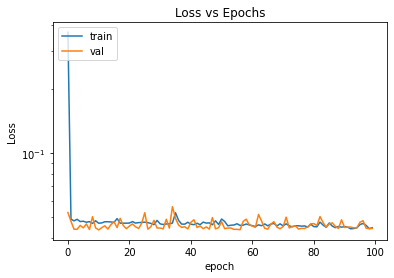

In [291]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [292]:
predictions_all = model.predict(X)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

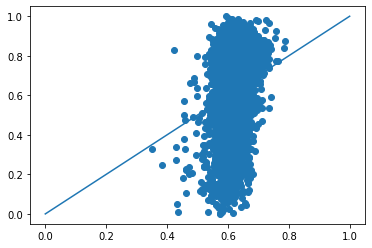

In [299]:
xlim = 1
x = np.linspace(0,xlim,11)
plt.plot(x, x)

# x = np.linspace(1,1,10)
plt.scatter(predictions_all,y)
# plt.plot(x,x)

In [294]:
import seaborn as snsn

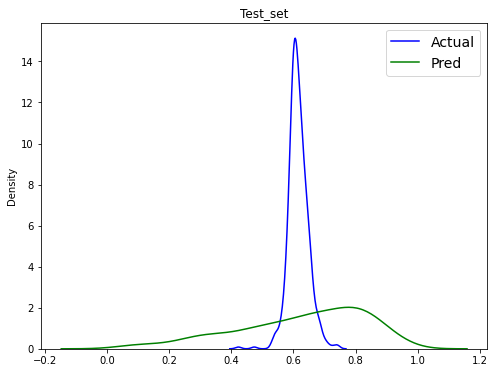

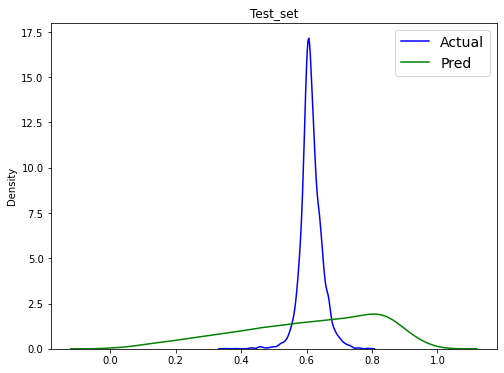

In [295]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_test.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')

fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_train.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_train.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')


In [296]:
sns.kdeplot(y,label="",ax=ax,c='b')

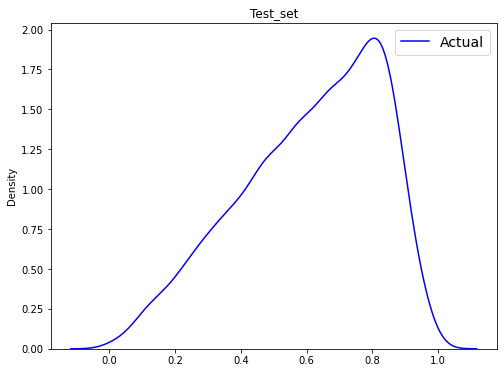

In [297]:
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(y.ravel(),label="",ax=ax,c='b')
# sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')

In [298]:
y.hist()

AttributeError: ignored